In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-glyphs-1812-characters/Glyphs_TMNIST_updated.csv


# Abstract

* I have used the TMNIST (MNIST Typography) dataset Glyphs a collection of over 500,000 MNIST-style images comprised of 2,990 different font styles and 1,812 distinct glyphs.

* The csv file is as follows:

1. Column headers in the first row are ['fontname', 'glyphname', 'label','1', '2',.....'784'].
2. 'Acme-Regular' and 'ZillaSlab-Bold' are only a couple of the font file names in the 'font_name' column.
3. The unicodedata name for the glyph, such as "LATIN CAPITAL LETTER A" and "DEVANAGARI LETTER AA," is found in the "glyph_name" column.
4. The 'glyphname' column provides the names of both characters, joined together with a '+' symbol, for glyphs that are represented by more than one unicode character. For instance, "" has the glyphname "DEVANAGARI SIGN ANUSVARA + DEVANAGARI LETTER A"
5. The "label" column includes letters like "," "E," or "." the 784 additional columns




# Reading Dataset

In [25]:
# Reading Data
df = pd.read_csv('/kaggle/input/tmnist-glyphs-1812-characters/Glyphs_TMNIST_updated.csv')
df.head()

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [26]:
print(f"The Shape of the Dataframe is: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")

The Shape of the Dataframe is: (565292, 787)
Number of Samples: 565292


In [27]:
# Alphanumeric and Symbols List

symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
           '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@','[',']','\\','^','_','`','{','}',"|",'~']

len(symbols)

94

In [28]:
# Get all the sample hows label are present in the list "symbols"

df = df[df.label.isin(symbols)]

In [29]:
# DataFrame Description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,272541.0,0.000257,0.059226,0.0,0.0,0.0,0.0,20.0
781,272541.0,0.000143,0.042445,0.0,0.0,0.0,0.0,19.0
782,272541.0,0.000033,0.012850,0.0,0.0,0.0,0.0,6.0
783,272541.0,0.000033,0.012850,0.0,0.0,0.0,0.0,6.0


In [30]:
# DataFrame feature's Datatype

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272541 entries, 0 to 565291
Data columns (total 787 columns):
 #    Column      Dtype 
---   ------      ----- 
 0    font_name   object
 1    glyph_name  object
 2    label       object
 3    1           int64 
 4    2           int64 
 5    3           int64 
 6    4           int64 
 7    5           int64 
 8    6           int64 
 9    7           int64 
 10   8           int64 
 11   9           int64 
 12   10          int64 
 13   11          int64 
 14   12          int64 
 15   13          int64 
 16   14          int64 
 17   15          int64 
 18   16          int64 
 19   17          int64 
 20   18          int64 
 21   19          int64 
 22   20          int64 
 23   21          int64 
 24   22          int64 
 25   23          int64 
 26   24          int64 
 27   25          int64 
 28   26          int64 
 29   27          int64 
 30   28          int64 
 31   29          int64 
 32   30          int64 
 33   31     

In [31]:
# Number of Fonts in the Dataframe
print(f"Number of unique fonts present in the Dataset: {len(df.font_name.unique())}")

Number of unique fonts present in the Dataset: 3019


In [32]:
# Number of unique character in the Dataframe
print(f"Number of unique character present in the Dataset: {len(df.label.unique())}")

Number of unique character present in the Dataset: 94


In [33]:
# Spliting the Labels and the features

X = df.drop(columns=['font_name','glyph_name','label']).values
y = df[['label']].values
del df

In [34]:
X = X.astype('u1')
X.dtype

dtype('uint8')

In [35]:
X.shape, y.shape

((272541, 784), (272541, 1))

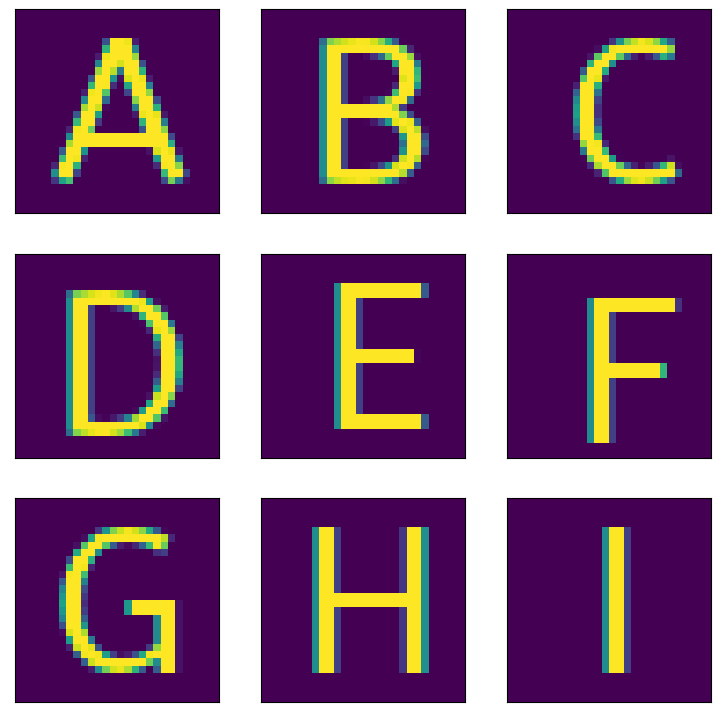

In [36]:
# Display few of the characters

import matplotlib.pyplot as plt

X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()
del X_images

# Split the Dataframe into Training and Test Dataframe

We use train_test_split from sklearn to split our dataframe

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [38]:
X_train.shape, X_test.shape

((245286, 784), (27255, 784))

In [39]:
y_train.shape, y_test.shape

((245286,), (27255,))

# Binarize Labels

It is used for encoding categorical variables or labels. It converts a categorical target column into multiple binary columns, with a 1 or 0 for each category. 

In [40]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(245286,)
Test labels dimension:
(27255,)


# Normalize the Training and Testing Dataset

Scaling the input features so that they have a similar range and distribution. It can help to improve the performance and stability of the model.

In [41]:
# Normalizing the Dataset for the Neural Network

X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

# Dense Neural Network

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score

In [43]:
# Create Model

model = Sequential()
model.add(Dense(250, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train_label.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 125)               31375     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 94)                9494      
                                                                 
Total params: 249,719
Trainable params: 249,719
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Configure the model and start training
model.fit(X_train, y_train_label, epochs=50, batch_size=150, verbose=1, validation_split=0.1)

Epoch 1/50
1472/1472 [==============================] - 13s 8ms/step - loss: 0.7790 - accuracy: 0.7944 - val_loss: 0.4879 - val_accuracy: 0.8530
Epoch 2/50
1472/1472 [==============================] - 11s 8ms/step - loss: 0.4399 - accuracy: 0.8653 - val_loss: 0.4193 - val_accuracy: 0.8709
Epoch 3/50
1472/1472 [==============================] - 11s 8ms/step - loss: 0.3724 - accuracy: 0.8802 - val_loss: 0.3777 - val_accuracy: 0.8812
Epoch 4/50
1472/1472 [==============================] - 11s 7ms/step - loss: 0.3306 - accuracy: 0.8912 - val_loss: 0.3585 - val_accuracy: 0.8850
Epoch 5/50
1472/1472 [==============================] - 11s 7ms/step - loss: 0.2987 - accuracy: 0.9003 - val_loss: 0.3366 - val_accuracy: 0.8945
Epoch 6/50
1472/1472 [==============================] - 11s 8ms/step - loss: 0.2757 - accuracy: 0.9068 - val_loss: 0.3453 - val_accuracy: 0.8925
Epoch 7/50
1472/1472 [==============================] - 11s 7ms/step - loss: 0.2551 - accuracy: 0.9135 - val_loss: 0.3242 - val_ac

In [46]:
# Test the model after training
test_results = model.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')

852/852 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.9118
Test results - Accuracy: 0.9117593169212341%


# Convolution Neural Network

A typical CNN architecture consists of three types of layers: convolutional layers, pooling layers, and fully connected layers. The convolutional layers perform feature extraction by applying a set of filters to the input image, producing a set of feature maps. The pooling layers then downsample the feature maps, reducing the spatial dimensions of the data. Finally, the fully connected layers perform classification by taking the output of the previous layers and mapping it to a set of output classes.

In [47]:
# Reshape X_train and X_test for CNN

X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

In [48]:
X_train.shape

(245286, 28, 28, 1)

In [49]:
#CNN Model

cnnmodel = Sequential()
cnnmodel.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128,activation='relu'))
cnnmodel.add(Dense(y_train_label.shape[1], activation='softmax'))
cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [57]:
# CNN Model Summary

cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)             

In [58]:
# Train the CNN Model

result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=50, batch_size=100, verbose=1)

Epoch 1/50
2208/2208 [==============================] - 98s 44ms/step - loss: 0.0842 - accuracy: 0.9687 - val_loss: 0.2141 - val_accuracy: 0.9483
Epoch 2/50
2208/2208 [==============================] - 99s 45ms/step - loss: 0.0829 - accuracy: 0.9692 - val_loss: 0.2200 - val_accuracy: 0.9473
Epoch 3/50
2208/2208 [==============================] - 97s 44ms/step - loss: 0.0811 - accuracy: 0.9692 - val_loss: 0.2190 - val_accuracy: 0.9478
Epoch 4/50
2208/2208 [==============================] - 100s 45ms/step - loss: 0.0802 - accuracy: 0.9698 - val_loss: 0.2407 - val_accuracy: 0.9448
Epoch 5/50
2208/2208 [==============================] - 98s 44ms/step - loss: 0.0802 - accuracy: 0.9702 - val_loss: 0.2282 - val_accuracy: 0.9470
Epoch 6/50
2208/2208 [==============================] - 97s 44ms/step - loss: 0.0779 - accuracy: 0.9709 - val_loss: 0.2319 - val_accuracy: 0.9468
Epoch 7/50
2208/2208 [==============================] - 99s 45ms/step - loss: 0.0771 - accuracy: 0.9707 - val_loss: 0.2358 

In [59]:
# Test the CNN model after training
test_results = cnnmodel.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy:{round(test_results[1],4)*100}%')

852/852 [==============================] - 6s 6ms/step - loss: 0.2944 - accuracy: 0.9481
Test results - Accuracy:94.81%


# Visualizing the model performance

In [60]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()


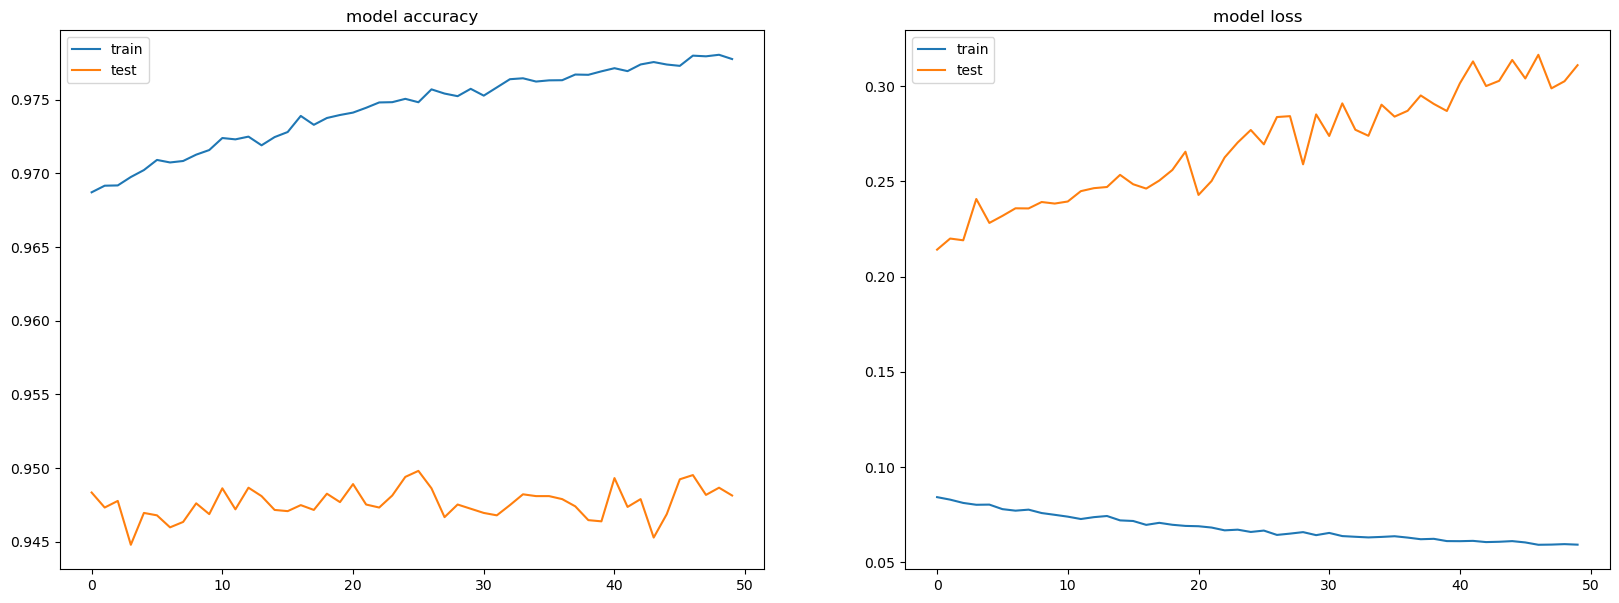

In [61]:
Plott(result)

# Conclusion

Accuracy was 94.81% utilizing a CNN Model with 50 epochs and a batch size of 100. Additionally, by altering the CNN model's epoch and batch size and evaluating the results, the model's accuracy can be improved.

# References

1. https://www.kaggle.com/code/nikhilkuttan/tmnist-glyphs-cnn
2. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
3. https://www.kaggle.com/code/rushabhfegade/tmnist-glyphs/notebook#Split-the-Dataframe-into-Training-and-Test-Dataframe

# MIT License

Copyright (c) 2023 Anushka Rajesh Darade

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

